In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering

In [15]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape

(200, 5)

In [4]:
#some more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#statistical measures
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#checking missing values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
x=df.iloc[:,[3,4]].values

In [9]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [10]:
#finding wcss values for different number of Clusters

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',max_iter=300,random_state=42,n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print("The wcss values for different number of Clusters:")
wcss

The wcss values for different number of Clusters:


[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21862.092672182895,
 19672.072849014323]

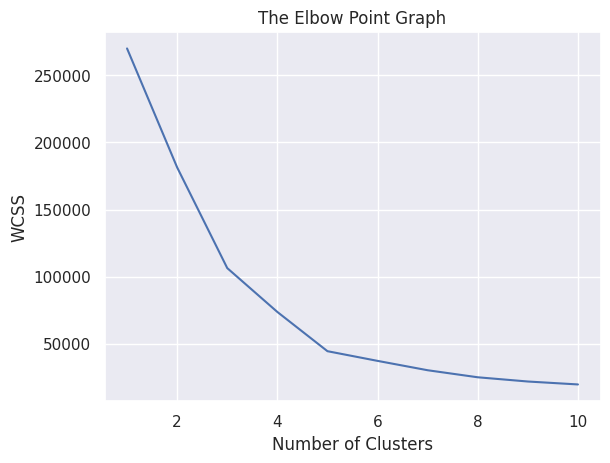

In [11]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans=KMeans(n_clusters=5, init='k-means++',max_iter=300,random_state=0)
#return the label for each datapoint based on their cluster

y=kmeans.fit_predict(x)

y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

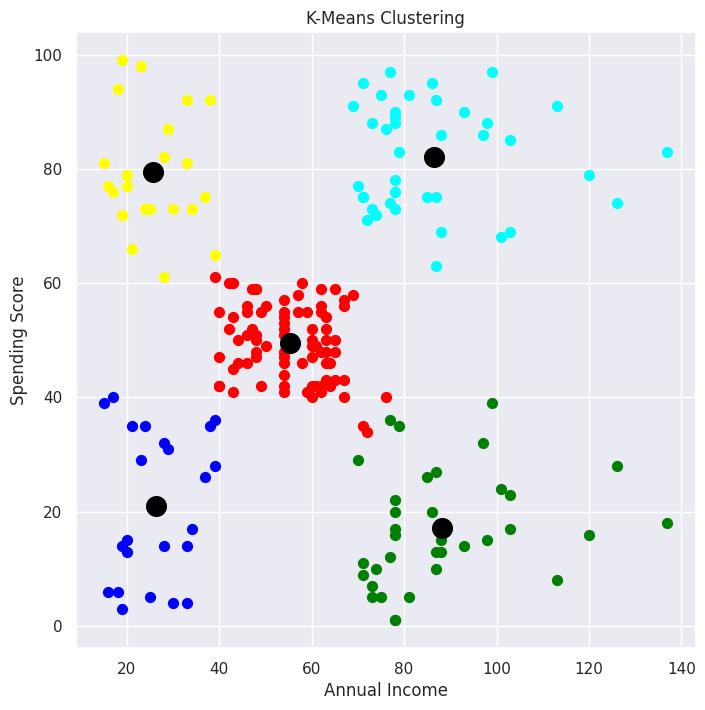

In [13]:
#plotting all the clusters and their centroid

plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='Cluster 0')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='Cluster 1')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='cyan',label='Cluster 2')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='blue',label='Cluster 4')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='centroids')
plt.title("K-Means Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

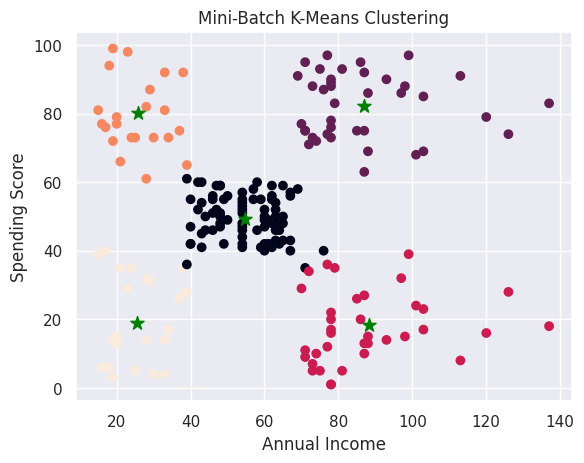

In [16]:
# Create an instance of MiniBatchKMeans
mini_batch_kmeans = MiniBatchKMeans(n_clusters=5,batch_size=2048,n_init=10)

# Fit the data to the algorithm
mini_batch_kmeans.fit(x)

# Get the cluster labels
cluster_labels = mini_batch_kmeans.labels_

# Get the cluster centers
cluster_centers = mini_batch_kmeans.cluster_centers_

# Visualize the clusters and centroids
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=100, c='green')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Mini-Batch K-Means Clustering")
plt.show()

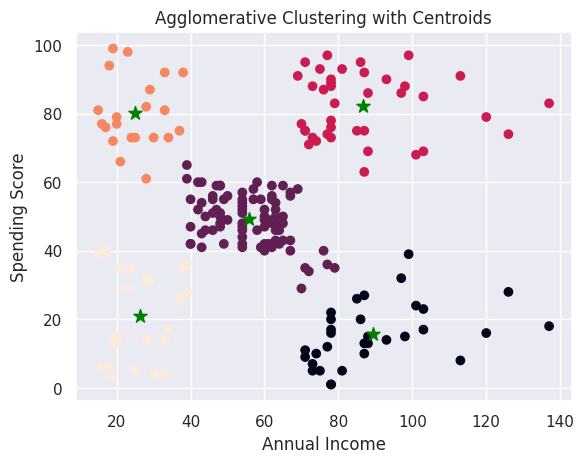

In [19]:
# Create an instance of AgglomerativeClustering with the desired number of clusters
agglomerative_clustering = AgglomerativeClustering(n_clusters=5)

# Fit the data to the algorithm
cluster_labels = agglomerative_clustering.fit_predict(x)

# Calculate the centroids
cluster_centers = []
for label in np.unique(cluster_labels):
    cluster_centers.append(np.mean(x[cluster_labels == label], axis=0))

# Convert centroids to numpy array
cluster_centers = np.array(cluster_centers)

# Visualize the clusters and centroids
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=100, c='green')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Agglomerative Clustering with Centroids")
plt.show()


In [20]:
from sklearn import metrics
score_agglomerative = metrics.silhouette_score(x,cluster_labels)

print("Score of Agglomerative Clustering = ", score_agglomerative)

Score of Agglomerative Clustering =  0.5529945955148897
